**Topik:** Klasifikasi pada Wholesale Customers Data menggunakan Decision Tree.

<b>Kelompok: 5</b>

Anggota:
1. Riodino Raihan - 1301220413
2. Muhammad Azmi - 1301223282
3. Faiq Misbah Yazdi - 1301223228

##**A. Pendahuluan**
#####**Perkenalan Dataset**
Dataset yang dipilih adalah "Wholesale Customers Data". Dataset ini berisi informasi mengenai pembelian berbagai produk oleh pelanggan grosir. Data ini terdiri dari beberapa fitur utama yang mencakup jumlah pembelian dalam berbagai kategori produk seperti Fresh, Milk, Grocery, Frozen, Detergents_Paper, dan Delicassen. Selain itu, dataset ini juga mencakup informasi mengenai region dan channel pelanggan.

######**Tujuan Masalah:**
Tujuan dari proyek ini adalah untuk melakukan klasifikasi pelanggan berdasarkan region menggunakan metode Machine Learning. Dengan memodelkan hubungan antara data pembelian dan region pelanggan, kita dapat mengklasifikasikan pelanggan ke dalam region yang tepat berdasarkan data pembelian mereka.

##**B. Data Preparation**

###Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

###Import Dataset

In [ ]:
dataset = pd.read_csv('Wholesale customers data.csv', encoding = 'latin1')

###Eksploration Data

###Menampilkan 5 data teratas & terakhir dari dataset.



In [ ]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
dataset.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


###Menampilkan jenis dari tiap feature dari dataset.

In [ ]:
dataset.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

Mencari tahu apakah terdapat suatu data yang hilang atau tidak.

In [ ]:
print("\nMissiing Values:")
print(dataset.isnull().sum())


Missiing Values:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


###Membuat boxplots untuk mengvisualisasi outlier.

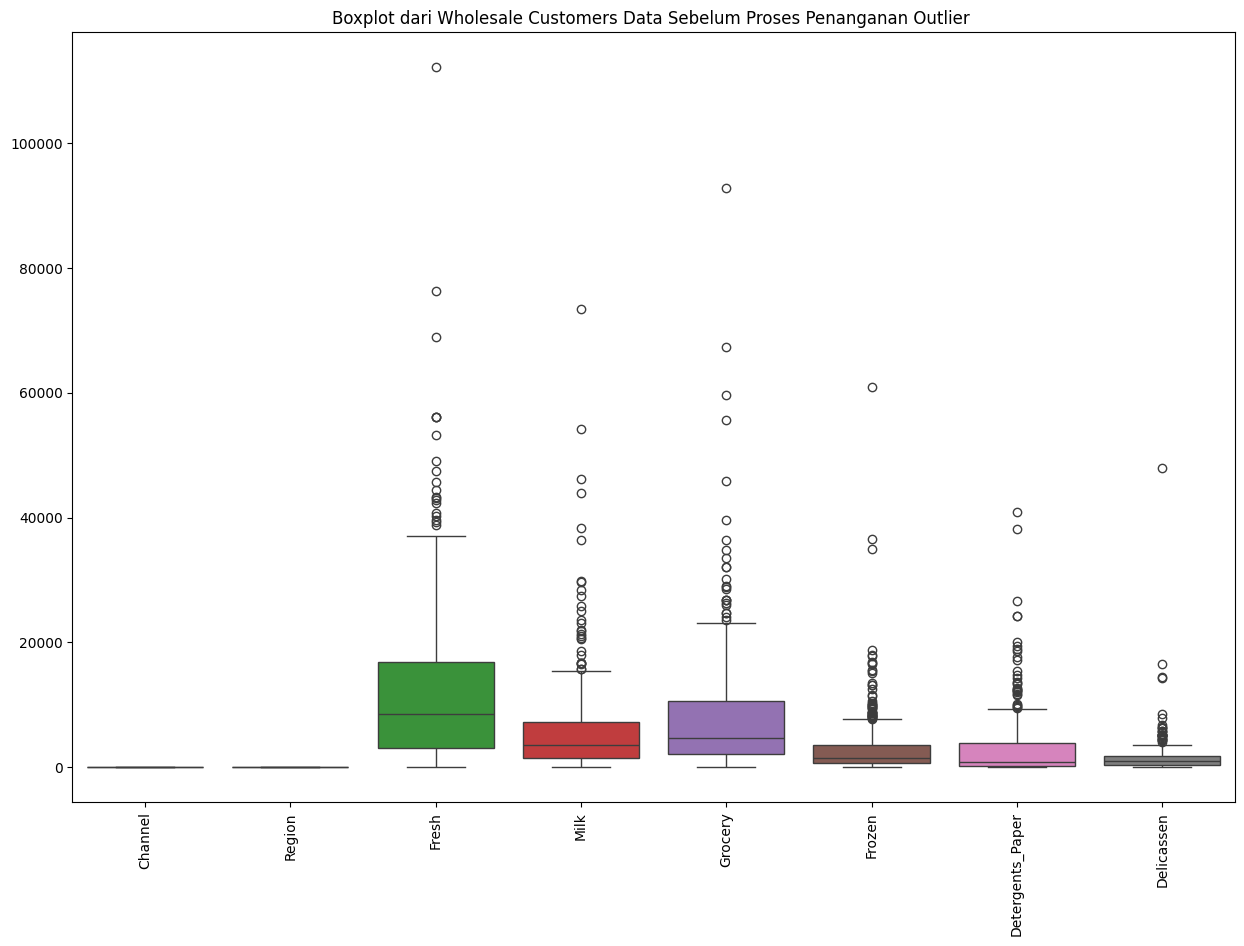

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=dataset)
plt.xticks(rotation=90)
plt.title('Boxplot dari Wholesale Customers Data Sebelum Proses Penanganan Outlier ')
plt.show()

Berikut adalah beberapa poin analisis yang dapat diambil dari visualisasi ini:
1. Channel dan Region terlihat sebagai fitur kategorikal yang tidak memiliki outliers yang terlihat. Distribusi data untuk fitur-fitur ini cukup sederhana, tanpa variasi yang signifikan.
2. Fitur Fresh menunjukkan adanya banyak outliers, dengan beberapa nilai yang sangat tinggi (di atas 60,000 dan bahkan mendekati 100,000). Median dari fitur ini berada sekitar 8,000.
Interquartile Range (IQR) untuk Fresh cukup lebar, menunjukkan variasi yang besar dalam data pembelian Fresh.
3. Fitur Milk juga memiliki banyak outliers, dengan beberapa nilai yang sangat tinggi (di atas 20,000). Median untuk Milk berada di sekitar 3,750.
Distribusi untuk Milk menunjukkan bahwa sebagian besar data berada di bawah 10,000 dengan beberapa outliers yang sangat besar.
4. Fitur Grocery memiliki beberapa outliers yang sangat tinggi, dengan nilai mendekati 40,000. Median dari fitur ini berada di sekitar 3,000.
Seperti Milk, Grocery memiliki distribusi data yang menunjukkan sebagian besar data berada di bawah 10,000 dengan beberapa outliers yang sangat besar.
5. Fitur Frozen memiliki banyak outliers, dengan nilai yang mencapai 20,000. Median untuk Frozen berada di sekitar 1,200.
Distribusi untuk Frozen lebih sempit dibandingkan dengan Fresh, Milk, dan Grocery, namun tetap memiliki banyak outliers.
6. Fitur Detergents_Paper memiliki beberapa outliers yang cukup tinggi, dengan nilai mendekati 20,000. Median dari fitur ini berada di sekitar 800.
Distribusi data untuk Detergents_Paper cukup sempit, namun terdapat beberapa outliers yang sangat signifikan.
7. Fitur Delicassen memiliki beberapa outliers, dengan nilai mendekati 20,000. Median untuk Delicassen berada di sekitar 965.
Distribusi untuk Delicassen menunjukkan sebagian besar data berada di bawah 5,000 dengan beberapa outliers yang sangat besar.


###Membuat heatmap untuk mengetahui korelasi antar feature.

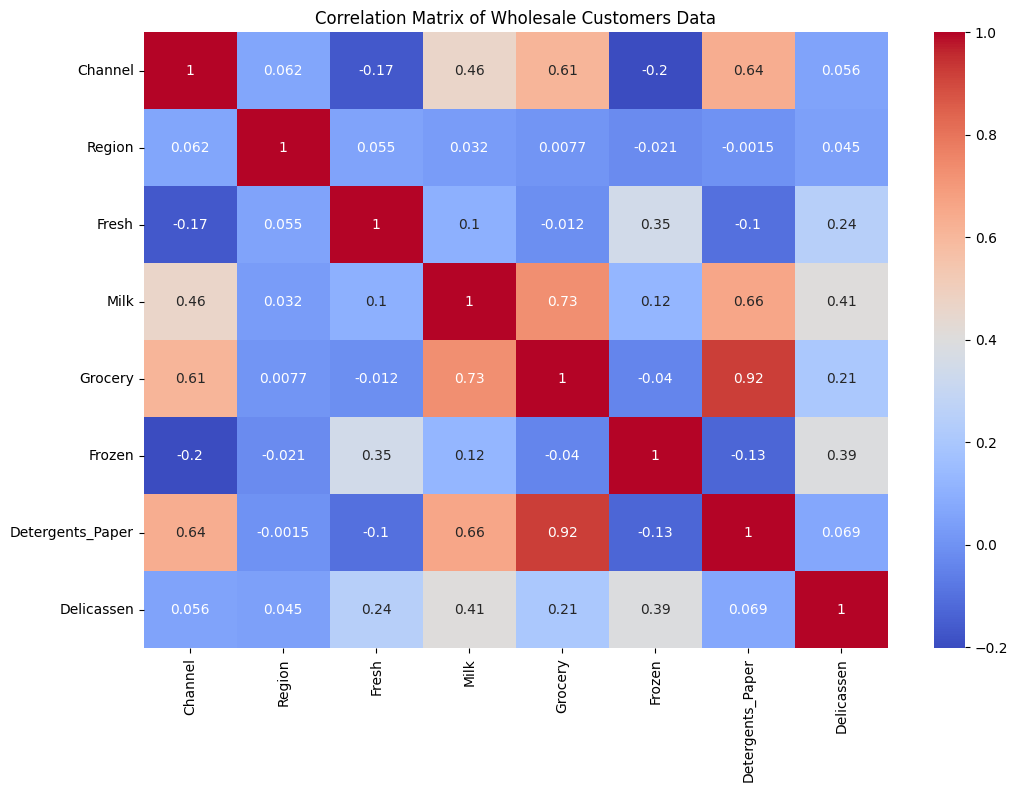


Correlation of features with target variable (Region):
Region              1.000000
Channel             0.062028
Fresh               0.055287
Delicassen          0.045212
Milk                0.032288
Grocery             0.007696
Detergents_Paper   -0.001483
Frozen             -0.021044
Name: Region, dtype: float64


In [ ]:
# Menghitung matriks korelasi
correlation_matrix = dataset.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wholesale Customers Data')
plt.show()

# Melihat korelasi antara fitur dengan target variabel
correlation_with_target = correlation_matrix['Region'].sort_values(ascending=False)
print("\nCorrelation of features with target variable (Region):")
print(correlation_with_target)

Berdasarkan visualisasi heatmap tersebut, Region (*feature target*) tidak memiliki korelasi signifikan dengan fitur-fitur lainnya, yang menunjukkan bahwa region pelanggan mungkin tidak terlalu dipengaruhi oleh jumlah pembelian produk tertentu.

 Model machine learning bergantung pada hubungan antara fitur dan target untuk membuat prediksi yang akurat. Dengan demikian, Fitur yang memiliki korelasi rendah dengan target variabel tidak memberikan banyak informasi yang berguna untuk prediksi sehingga dapat Dapat menurunkan Akurasi machine learning.

## **C. Data Preprocessing**

Menggunakan Metode IQR

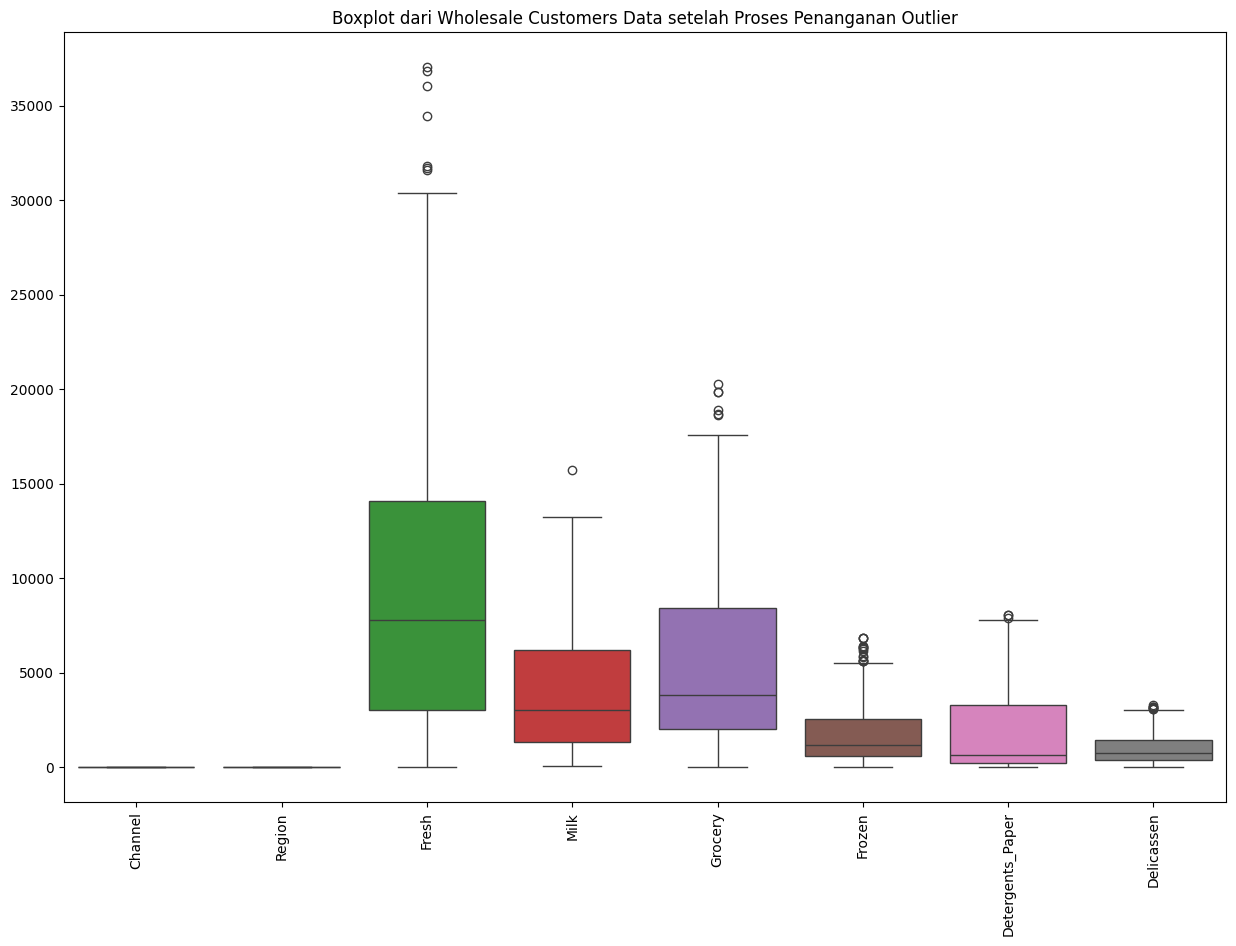

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Terapkan metode IQR untuk tiap kolomnya.
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numeric_columns:
    dataset = remove_outliers_iqr(dataset, col)

# Visualisasi boxplot setelah menangani outliernya.
plt.figure(figsize=(15, 10))
sns.boxplot(data=dataset)
plt.xticks(rotation=90)
plt.title('Boxplot dari Wholesale Customers Data setelah Proses Penanganan Outlier')
plt.show()


Data Transformation
Memisahkan data menjadi dua bagian, yaitu X dan Y.
Dalam data tranformation ini, untuk variable X kita akan membuang atau meng-*drop* feature 'Grocery' dan 'Frozen' sebab kedua feature tersebut adalah dua feature yang memiliki korleasi terendah dengan 'Region' yang merupakan feature target.  

In [ ]:
# Fitur yang akan dihapus
features_to_drop = ['Detergents_Paper', 'Grocery', 'Frozen']
X = dataset.drop(columns=['Region'] + features_to_drop)
Y = dataset['Region']
print("\nFeatures included in the model:")
print(X.columns)
# Menampilkan 5 baris pertama dari x dan y
# agar memastikan data mereka terpisah dengan benar.
print("\nFirst few rows of X:")
print(X.head())
print("\nFirst few rows of Y:")
print(Y.head())






Features included in the model:
Index(['Channel', 'Fresh', 'Milk', 'Delicassen'], dtype='object')

First few rows of X:
   Channel  Fresh  Milk  Delicassen
0        2  12669  9656        1338
1        2   7057  9810        1776
3        1  13265  1196        1788
5        2   9413  8259        1451
6        2  12126  3199         545

First few rows of Y:
0    3
1    3
3    3
5    3
6    3
Name: Region, dtype: int64


##**D. Data Splitting**
Membagi dataset menjadi dua bagian, yaitu data pelatihan (X_train dan Y_Train) dan data pengujian (X_test dan Y_test). Dalam kasus ini, dataset akan dibagi menjadi data pelatihan (75%) dan data pengujian (25%).

In [ ]:
from sklearn.model_selection import train_test_split
# Membagi dataset menjadi set pelatihan dan set pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
# Menampilkan ukuran setiap set
print("\nSize of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of Y_train:", Y_train.shape)
print("Size of Y_test:", Y_test.shape)
# Display beberapa baris pertama untuk memastikan data dipisahkan dengan benar
print("\nFirst few rows of X_train:")
print(X_train.head())
print("\nFirst few rows of Y_train:")
print(Y_train.head())
print("\nFirst few rows of X_test:")
print(X_test.head())
print("\nFirst few rows of Y_test:")
print(Y_test.head())


Size of X_train: (238, 4)
Size of X_test: (80, 4)
Size of Y_train: (238,)
Size of Y_test: (80,)

First few rows of X_train:
     Channel  Fresh  Milk  Delicassen
214        2   2362  6551         791
89         1  24904  3836        3178
156        2   3830  5291        3182
8          1   5963  3648         750
269        1  15218   258         204

First few rows of Y_train:
214    1
89     3
156    3
8      3
269    1
Name: Region, dtype: int64

First few rows of X_test:
     Channel  Fresh  Milk  Delicassen
108        2   1531  8397        1236
387        1  20918  1916         961
33         1  29729  4786        1083
360        1  19746  2872         503
11         2  13146  1124         497

First few rows of Y_test:
108    3
387    3
33     3
360    3
11     3
Name: Region, dtype: int64


##**E. Penskalaan Fitur (Feature Scalling)**
Melakuakan penskalaan fitur sehingga rerata(mean) sekitar 0 dan simpangan baku (standad deviation) sekitar 1.
Dilakukan dengan menggunakan MinMaxScaler dari sklearn. Penskalaan ini penting untuk memastikan bahwa semua fitur memiliki rentang nilai yang serupa, yang dapat meningkatkan performa banyak algoritma machine learning.

In [ ]:
# Init MinMaxScaler
scaler = MinMaxScaler()
# Fit scaler pada data pelatihan dan transformasi data pelatihan
X_train_scaled = scaler.fit_transform(X_train)
# Melakukan transformasi data uji menggunakan scaler yang sama
X_test_scaled = scaler.transform(X_test)
# Konversi data yang telah diskalakan kembali ke datafrme untuk memudahkan pembacaan
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
# Tampilkan beberapa baris pertama dari data pelatihan yang telah diskalakan
print("\nBaris pertama dari X_train yang telah diskalakan:")
print(X_train_scaled_df.head())
# Tampilkan rata-rata dari data pelatihan yang telah diskalakan
print("\nRata-rata dari X_train yang telah diskalakan:")
print(X_train_scaled_df.mean())
# Tampilkan standar deviasi dari data pelatihan yang telah diskalakan
print("\nStandar deviasi dari X_train yang telah diskalakan:")
print(X_train_scaled_df.std())

# Tampilkan beberapa baris pertama dari data test yang telah diskalakan
print("\nBaris pertama dari X_test yang telah diskalakan:")
print(X_test_scaled_df.head())
# Tampilkan rata-rata dari data test yang telah diskalakan
print("\nRata-rata dari X_test yang telah diskalakan:")
print(X_test_scaled_df.mean())
# Tampilkan standar deviasi dari data test yang telah diskalakan
print("\nStandar deviasi dari X_test yang telah diskalakan:")
print(X_test_scaled_df.std())


Baris pertama dari X_train yang telah diskalakan:
   Channel     Fresh      Milk  Delicassen
0      1.0  0.063700  0.414444    0.241126
1      0.0  0.672400  0.241228    0.971542
2      1.0  0.103340  0.334056    0.972766
3      0.0  0.160938  0.229233    0.228580
4      0.0  0.410850  0.012951    0.061506

Rata-rata dari X_train yang telah diskalakan:
Channel       0.277311
Fresh         0.248623
Milk          0.259346
Delicassen    0.308509
dtype: float64

Standar deviasi dari X_train yang telah diskalakan:
Channel       0.448615
Fresh         0.222036
Milk          0.210668
Delicassen    0.252091
dtype: float64

Baris pertama dari X_test yang telah diskalakan:
   Channel     Fresh      Milk  Delicassen
0      1.0  0.041260  0.532219    0.377295
1      0.0  0.564767  0.118732    0.293146
2      0.0  0.802689  0.301837    0.330477
3      0.0  0.533119  0.179724    0.152999
4      1.0  0.354900  0.068202    0.151163

Rata-rata dari X_test yang telah diskalakan:
Channel       0.250000


##**F. Metode yang Digunakan**

Pada penelitian ini, kami menggunakan decision tree sbagai metode klasifikasi untuk memprediksi region pelanggan berdasarkan data pembelian mereka.

Decision Tree adalah metode klasifikasi yang menggunakan struktur pohon untuk membuat keputusan. Pohon tersebut terstruktur dengan node yang merepresentasikan atribut, cabang yang merepresentasikan nilai atribut, dan daun yang merepresentasikan kelas.

####Setting Parameter:
Untuk mendapatkan model Decision Tree terbaik, kami menggunakan Grid Search dengan parameter-parameter berikut:
- criterion: 'gini' atau 'entropy'.
  Criterion ini buat menentukan metrik yang digunakan untuk memilih atribut paling informatif dalam setiap pemisahan. 'gini' menggunakan impurity Gini, sedangkan 'entropy' menggunakan entropi informasi.

- max_depth: Nilai integer atau 'None'.
  Menentukan kedalaman maksimum pohon Jika 'None', pohon akan tumbuh hingga mencapai kemurnian sempurna atau hingga mencapai batas min_samples_split.

- min_samples_split: Nilai integer atau float. Menentukan jumlah minimum sampel yang diperlukan untuk membagi node internal.

- min_samples_leaf: Nilai integer atau float. Menentukan jumlah minimum sampel yang diperlukan untuk setiap daun.

##Implementasi Decision Tree pada dataset
Disini Kami melakukan pelatihan model Decision Tree Classifier menggunakan GridSearchCV atau cross validation dari lib grid search untuk menemukan parameter terbaik. Setelah menemukan model terbaik, kode ini mengevaluasi model tersebut menggunakan berbagai metrik seperti akurasi, classification report, dan confusion matrix.

In [ ]:
#Import Library dan Inisialisasi Model:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model
model = DecisionTreeClassifier(random_state=42)

# Parameter grid untuk GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Melakukan Grid Search untuk Decision Tree
grid_search_dt = GridSearchCV(model, param_grid_dt, cv=5)
grid_search_dt.fit(X_train_scaled, Y_train)

# Model Decision Tree terbaik dari Grid Search
best_dt = grid_search_dt.best_estimator_

# Prediksi dengan data testing menggunakan model terbaik
Y_pred_dt = best_dt.predict(X_test_scaled)

train_accuracy_dt = accuracy_score(Y_train, best_dt.predict(X_train_scaled))
test_accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print("Decision Tree - Train Accuracy:", train_accuracy_dt)
print("Decision Tree - Test Accuracy:", test_accuracy_dt)

print("\nClassification Report of Decision Tree (Best Model):")
print(classification_report(Y_test, Y_pred_dt))

print("\nConfusion Matrix of Decision Tree (Best Model):")
print(confusion_matrix(Y_test, Y_pred_dt))

# Menampilkan parameter terbaik untuk Decision Tree
print("\nBest Parameters for Decision Tree:", grid_search_dt.best_params_)

Decision Tree - Train Accuracy: 0.7605042016806722
Decision Tree - Test Accuracy: 0.725

Classification Report of Decision Tree (Best Model):
              precision    recall  f1-score   support

           1       1.00      0.12      0.22        16
           2       0.00      0.00      0.00         8
           3       0.72      1.00      0.84        56

    accuracy                           0.73        80
   macro avg       0.57      0.38      0.35        80
weighted avg       0.70      0.72      0.63        80


Confusion Matrix of Decision Tree (Best Model):
[[ 2  0 14]
 [ 0  0  8]
 [ 0  0 56]]

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


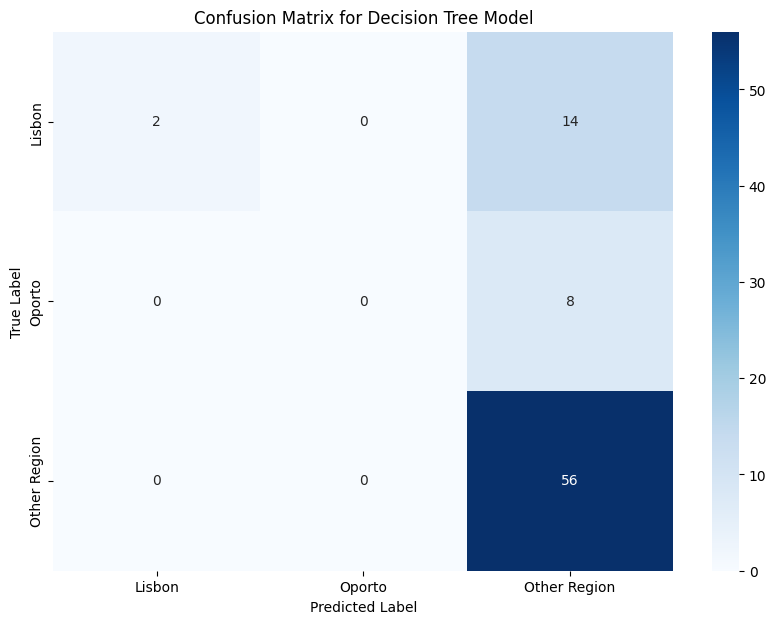

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_dt)

# Memplot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Lisbon', 'Oporto', 'Other Region'], yticklabels=['Lisbon', 'Oporto', 'Other Region'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()


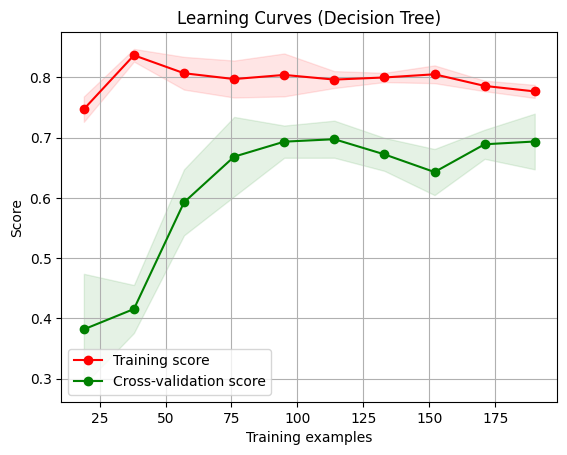

In [ ]:

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(best_dt, X_train_scaled, Y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Decision Tree)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()


##**G. Hasil & Analisis**
**1. Classification Report dan Confusion Matrix**
* Train Accuracy: 0.7605
* Test Accuracy: 0.725

**1.1 Classification Report:**
* Precision: \
  Lisbon (1): 1.00 \
  Oporto (2): 0.00 \
  Other Region (3): 0.72\
* Recall:\
  Lisbon (1): 0.12\
  Oporto (2): 0.00\
  Other Region (3): 1.00\
* F1-score:\
  Lisbon (1): 0.22\
  Oporto (2): 0.00\
  Other Region (3): 0.84
* Weighted Avg:
  Precision: 0.70
  Recall: 0.72
  F1-score: 0.63

**1.2 Confusion Matrix:**
* Lisbon: 2 prediksi benar dari 16, 14 prediksi salah ke Other Region
* Oporto: 0 prediksi benar dari 8, 8 prediksi salah ke Other Region
* Other Region: 56 prediksi benar dari 56

**2. Classification Report dan Confusion Matrix**
* Training Score:
Mulai dari 0.8 dan stabil di sekitar 0.7.
* Cross-Validation Score:
Mulai dari 0.3 dan stabil di sekitar 0.6.
* Gap:
Ada gap yang lebih besar antara training score dan cross-validation score, menunjukkan adanya lebih banyak overfitting.

##**H. Kesimpulan**
**1. Performa Model:**

* Model menunjukkan akurasi pelatihan sebesar 0.7605 dan akurasi pengujian sebesar 0.725.
* Model memiliki performa yang sangat baik dalam mengenali kategori Other Region dengan precision, recall, dan F1-score yang tinggi (0.72, 1.00, dan 0.84 secara berturut-turut).
* Namun, model menunjukkan performa yang sangat buruk dalam mengenali kategori Lisbon dan Oporto, dengan precision dan recall yang sangat rendah atau nol.

**2. Learning Curves:**

* Learning curves menunjukkan adanya gap yang signifikan antara training score dan cross-validation score, yang menunjukkan adanya overfitting. Model mampu mempelajari data pelatihan dengan baik, namun kurang mampu melakukan generalisasi pada data baru.

**3. Korelasi Antar Fitur:**

* Salah satu penyebab utama dari performa buruk model adalah nilai korelasi yang sangat rendah antara fitur-fitur lainnya dengan target fitur Region. Korelasi yang rendah ini menyebabkan model sulit untuk memprediksi kelas target dengan akurasi tinggi, terutama untuk kategori Lisbon dan Oporto.
